In [1]:
from PIL import Image
import gymnasium as gym
import warnings
warnings.filterwarnings('ignore')
import torch
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
env = gym.make('Taxi-v3')
env.reset()

(163, {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)})

In [3]:
def greedy_policy(eps, action_count, q_actions):
    probs = torch.ones(action_count) * eps / action_count
    best_action = torch.argmax(q_actions).item()
    probs[best_action] += 1.0 - eps
    action = torch.multinomial(probs, 1).item()
    return action

In [4]:
n_action = env.action_space.n
length_num = [0] * 1000
total_reward_num = [0] * 1000

gamma = 1
alpha = 0.4
eps = 0.1

Q = defaultdict(lambda: torch.zeros(n_action))

for num in range(1000):
    state = env.reset()[0]
    is_done = False
    is_break = False
    while not is_done and not is_break:
        action = greedy_policy(eps, n_action, Q[state])

        next_state, reward, is_done, is_break, _ = env.step(action)
        
        d_Q_s = alpha * (reward + gamma * torch.max(Q[next_state]) - Q[state][action])

        Q[state][action] += d_Q_s

        state = next_state

        length_num[num] += 1
        total_reward_num[num] += reward

policy = {}
for state, actions in Q.items():
    policy[state] = torch.argmax(actions).item()

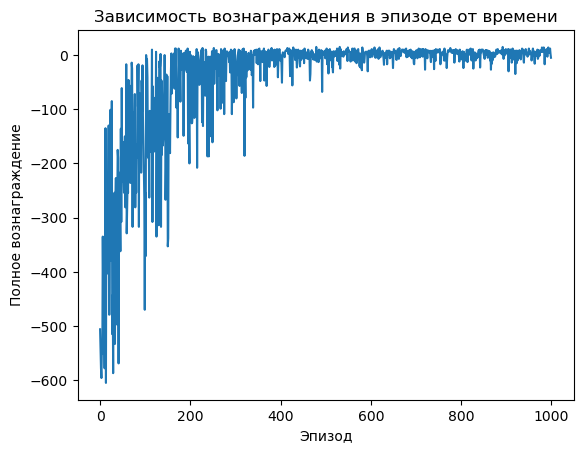

In [5]:
plt.plot(total_reward_num)
plt.title('Зависимость вознаграждения в эпизоде от времени')
plt.xlabel('Эпизод')
plt.ylabel('Полное вознаграждение')
plt.show()


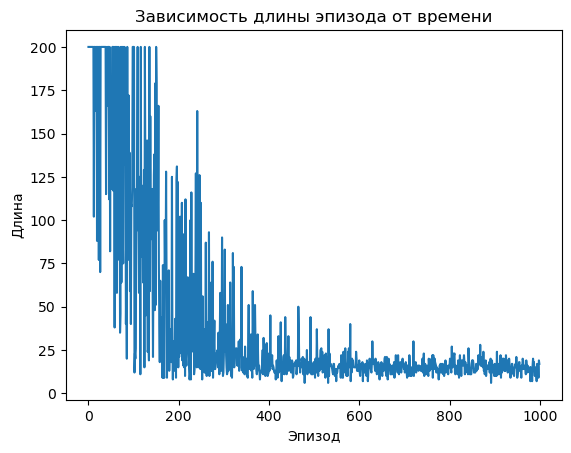

In [6]:
plt.plot(length_num)
plt.title('Зависимость длины эпизода от времени')
plt.xlabel('Эпизод')
plt.ylabel('Длина')
plt.show()

In [7]:
env.close()
env = gym.make('Taxi-v3', render_mode='human')
env.reset()
env.render()

In [8]:
sum_reward = 0
is_done = False
is_break = False
num_step = 0
action = 0
state = env.reset()[0]
while not is_done and not is_break: 
    action = policy[state]
    state, reward, is_done, is_break, info = env.step(action)
    sum_reward += reward

print("Final reward: ", reward)

Final reward:  20
